In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [4]:
import pandas as pd

# Define column names for a salary dataset
col_names = ['employee_id', 'age', 'education', 'job_title', 'years_experience', 'salary']

# Load dataset
salary_data = pd.read_csv(r"C:\Users\khale\OneDrive\Desktop\Machine learning\Assignment5\Salary_Data.csv", header=None, names=col_names)

# Display the first few rows
print(salary_data.head())


       employee_id       age  education  job_title  years_experience  salary
0  YearsExperience    Salary        NaN        NaN               NaN     NaN
1              1.1  39343.00        NaN        NaN               NaN     NaN
2              1.3  46205.00        NaN        NaN               NaN     NaN
3              1.5  37731.00        NaN        NaN               NaN     NaN
4              2.0  43525.00        NaN        NaN               NaN     NaN


In [5]:
#Define column names for salary dataset
col_names = ['employee_id', 'age', 'education', 'job_title', 'years_experience', 'salary']

# Load dataset
salary_data = pd.read_csv("Salary_Data.csv", header=None, names=col_names)

# Define feature columns (excluding 'employee_id' and 'salary')
feature_cols = ['age', 'education', 'job_title', 'years_experience']

# Features (X) and Target variable (y)
X = salary_data[feature_cols]  # Independent variables
y = salary_data['salary']      # Dependent variable

# Display first few rows
print(X.head())
print(y.head())


        age  education  job_title  years_experience
0    Salary        NaN        NaN               NaN
1  39343.00        NaN        NaN               NaN
2  46205.00        NaN        NaN               NaN
3  37731.00        NaN        NaN               NaN
4  43525.00        NaN        NaN               NaN
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: salary, dtype: float64


In [6]:
# Define feature columns (excluding 'employee_id' and 'salary')
feature_cols = ['age', 'education', 'job_title', 'years_experience']

# Features (X) and Target variable (y)
X = salary_data[feature_cols]  
y = salary_data['salary']      

# Split dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Display dataset shapes
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)


Training Features Shape: (21, 4)
Testing Features Shape: (10, 4)
Training Labels Shape: (21,)
Testing Labels Shape: (10,)


Mean Absolute Error (MAE): 8976.416666666666
Mean Squared Error (MSE): 104457595.27083333
R² Score: 0.5150656259316612


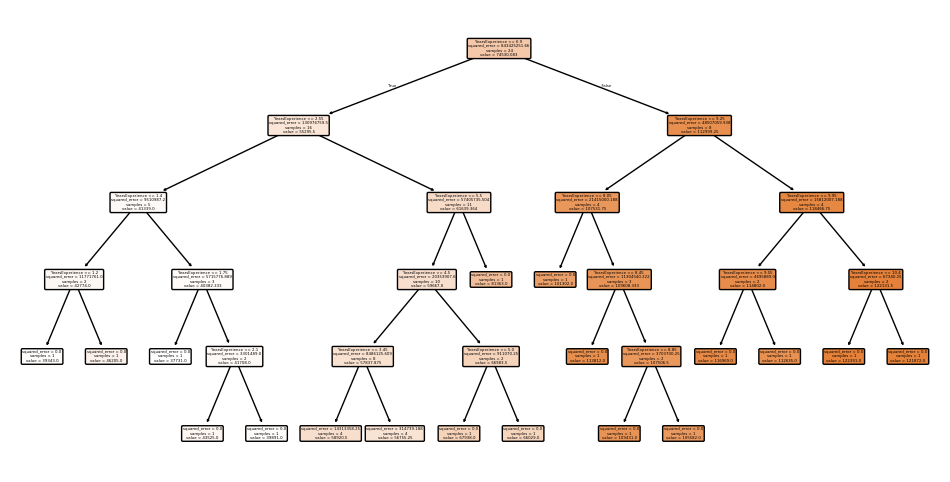

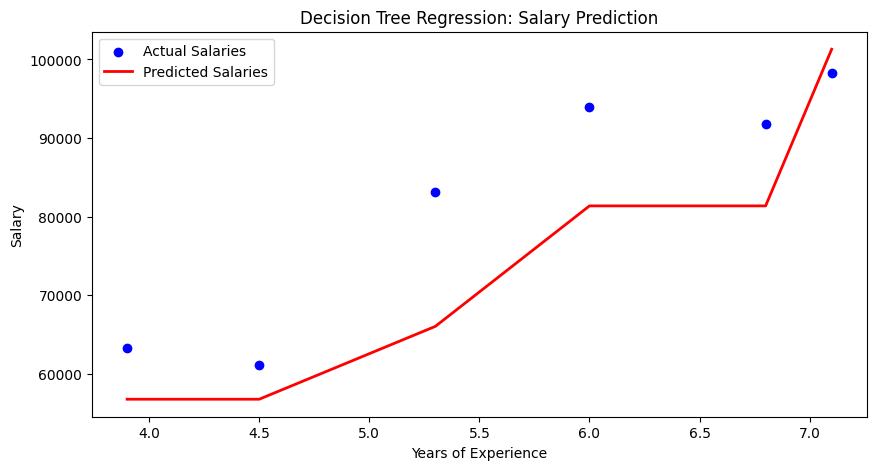

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = r"C:\Users\khale\OneDrive\Desktop\Machine learning\Assignment5\Salary_Data.csv"  # Update path if needed
salary_data = pd.read_csv(file_path)

# Define features (X) and target variable (y)
X = salary_data[['YearsExperience']]  # Independent variable
y = salary_data['Salary']  # Dependent variable

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create and train Decision Tree Regressor
clf = DecisionTreeRegressor(max_depth=5, random_state=1)  # Limit depth to avoid overfitting
clf.fit(X_train, y_train)

# Predict salaries for test set
y_pred = clf.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# ✅ Plot Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=['YearsExperience'], filled=True, rounded=True)
plt.show()

# ✅ Visualizing Predictions vs Actual Data
X_sorted = X_test.sort_values(by='YearsExperience')
y_sorted_pred = clf.predict(X_sorted)

plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label="Actual Salaries")
plt.plot(X_sorted, y_sorted_pred, color='red', linewidth=2, label="Predicted Salaries")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Decision Tree Regression: Salary Prediction")
plt.legend()
plt.show()


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)  # ✅ Use this instead of accuracy


Mean Absolute Error (MAE): 8976.416666666666
Mean Squared Error (MSE): 104457595.27083333
R² Score: 0.5150656259316612


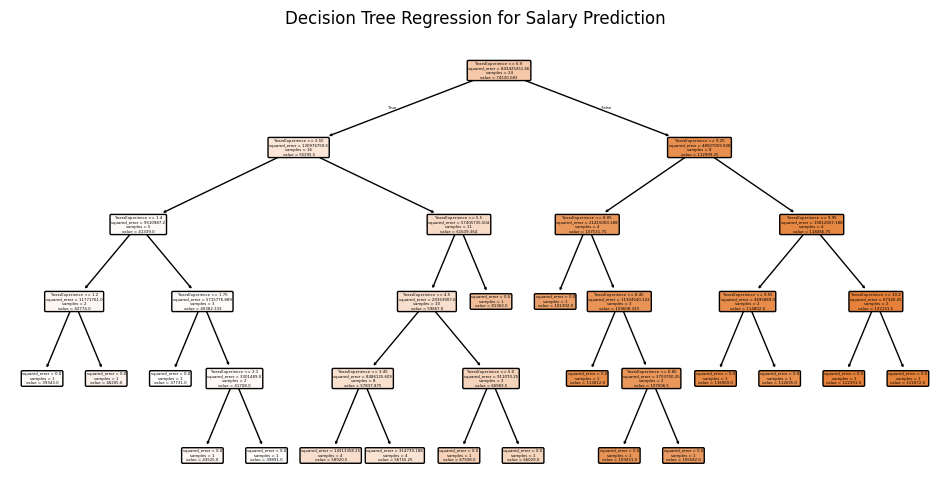

|--- YearsExperience <= 6.90
|   |--- YearsExperience <= 2.55
|   |   |--- YearsExperience <= 1.40
|   |   |   |--- YearsExperience <= 1.20
|   |   |   |   |--- value: [39343.00]
|   |   |   |--- YearsExperience >  1.20
|   |   |   |   |--- value: [46205.00]
|   |   |--- YearsExperience >  1.40
|   |   |   |--- YearsExperience <= 1.75
|   |   |   |   |--- value: [37731.00]
|   |   |   |--- YearsExperience >  1.75
|   |   |   |   |--- YearsExperience <= 2.10
|   |   |   |   |   |--- value: [43525.00]
|   |   |   |   |--- YearsExperience >  2.10
|   |   |   |   |   |--- value: [39891.00]
|   |--- YearsExperience >  2.55
|   |   |--- YearsExperience <= 5.50
|   |   |   |--- YearsExperience <= 4.50
|   |   |   |   |--- YearsExperience <= 3.45
|   |   |   |   |   |--- value: [58920.50]
|   |   |   |   |--- YearsExperience >  3.45
|   |   |   |   |   |--- value: [56755.25]
|   |   |   |--- YearsExperience >  4.50
|   |   |   |   |--- YearsExperience <= 5.00
|   |   |   |   |   |--- value: [6

In [12]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

# ✅ Plot the Decision Tree structure for Salary Prediction
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=['YearsExperience'], filled=True, rounded=True)
plt.title("Decision Tree Regression for Salary Prediction")
plt.show()

# ✅ Print textual representation of the tree
tree_rules = export_text(clf, feature_names=['YearsExperience'])
print(tree_rules)
